## Exploratory Data Analysis

### Objective 1: Analyze Patterns and Trends in Citizen Feedback Across Government Services and Agencies

Service volume by agency - count of how many survey responses each agency received and visualizing the top 10 most-engaged/complained-about agencies

c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


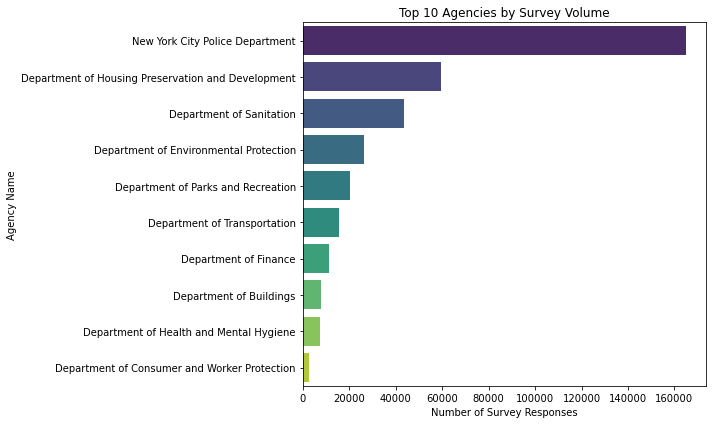

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Assigning df to cleaned csv file
df = pd.read_csv("cleaned.csv")

# Count survey responses per agency
agency_counts = df['Agency Name'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=agency_counts.values, y=agency_counts.index, palette='viridis')
plt.title('Top 10 Agencies by Survey Volume')
plt.xlabel('Number of Survey Responses')
plt.ylabel('Agency Name')
plt.tight_layout()
plt.show(); 

The bar chart shows a clear dominance of one category, with a steep drop in frequency among the remaining ones, indicating a strong imbalance. This suggests that the dataset is heavily skewed toward a few high-frequency categories. The color gradient enhances this contrast, helping visualize the relative distribution. Such a pattern is common in text data or categorical feedback, where a few themes dominate user responses.

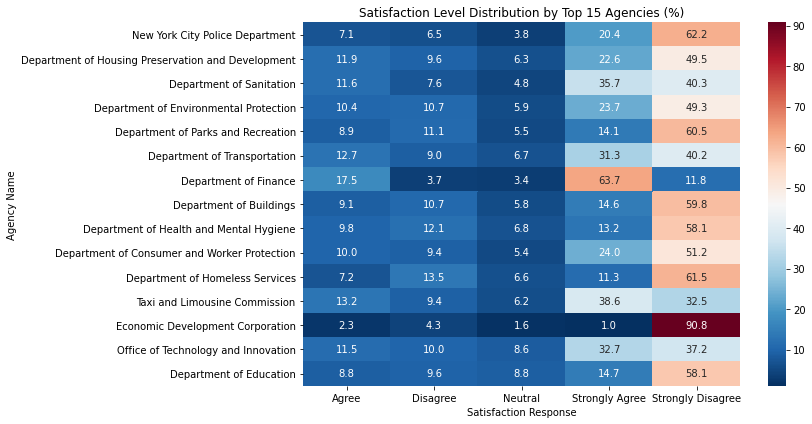

In [2]:
"""
Heatmap for Satisfaction Levels per Agency (Top 15)
"""

# Get top 15 agencies by total responses
top_agencies = df['Agency Name'].value_counts().head(15).index

# Filter the crosstab for just the top agencies
satisfaction_crosstab_top = pd.crosstab(df['Agency Name'], df['Satisfaction Response'])
satisfaction_crosstab_top = satisfaction_crosstab_top.loc[top_agencies]

# Normalize by row to get percentage
satisfaction_pct = satisfaction_crosstab_top.div(satisfaction_crosstab_top.sum(axis=1), axis=0) * 100

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(satisfaction_pct, annot=True, fmt=".1f", cmap="RdBu_r")
plt.title("Satisfaction Level Distribution by Top 15 Agencies (%)")
plt.ylabel("Agency Name")
plt.xlabel("Satisfaction Response")
plt.tight_layout()
plt.show(); 

The heatmap shows varying metric values across agencies, with most falling between moderate ranges. The strongly disagree column stands out, showing high values in Economic Development Corporation (up to 90.8), indicating possible dissatisfaction issues. Agencies with high values in the last column often have lower values in other satisfaction responses, suggesting an inverse relationship. This contrast highlights areas that may need improvement or further investigation.

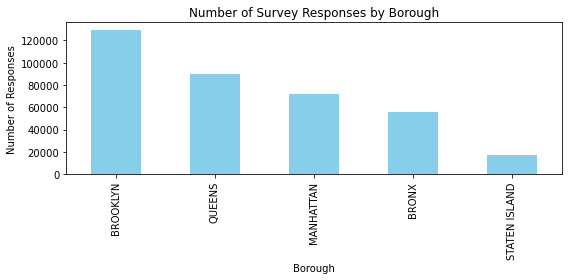

In [3]:
"""
Count number of survey responses per borough
"""
df['Borough'].value_counts().head().plot(kind='bar', figsize=(8, 4), color='skyblue')
plt.title('Number of Survey Responses by Borough')
plt.ylabel('Number of Responses')
plt.xlabel('Borough')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show(); 

The bar chart shows the survey responses by borough, with the Brooklyn borough having the most number of responses.

### Objective 2: Assess Overall Levels of Satisfaction in Service Resolutions 

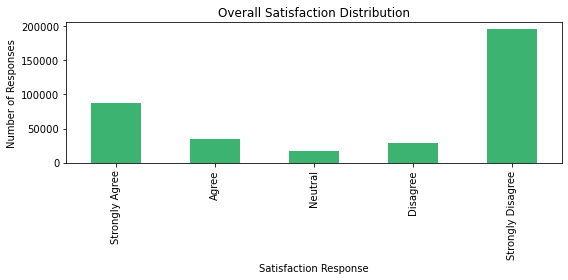

In [4]:
"""
Overall Satisfaction Distribution
"""

# Define the desired order
satisfaction_order = [
    'Strongly Agree', 'Agree', 'Neutral', 'Disagree', 'Strongly Disagree'
]

# Count values with correct order
satisfaction_counts = df['Satisfaction Response'].value_counts().reindex(satisfaction_order)

# Plot
satisfaction_counts.plot(kind='bar', color='mediumseagreen', figsize=(8, 4))
plt.title('Overall Satisfaction Distribution')
plt.ylabel('Number of Responses')
plt.xlabel('Satisfaction Response')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show(); 

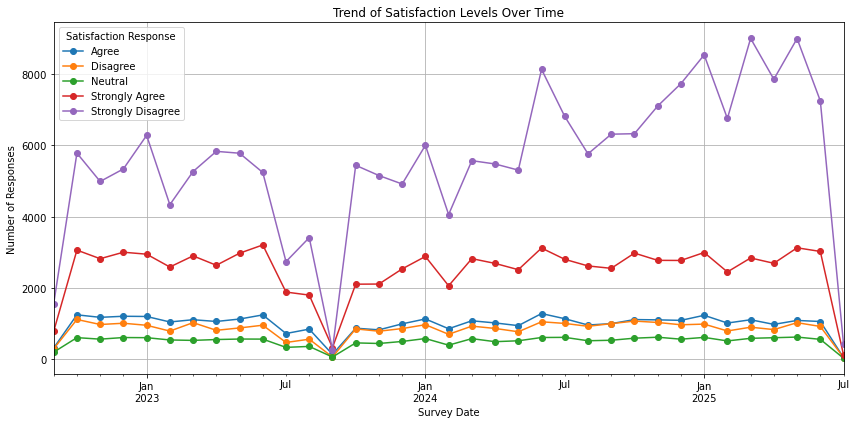

In [5]:
"""
Trend Over Time for Satisfaction Levels by year and month
"""

# Create a time column
df['Survey Date'] = pd.to_datetime(df['Survey Year'].astype(str) + '-' + df['Survey Month'].astype(str))

# Group by date and satisfaction response
trend_data = df.groupby(['Survey Date', 'Satisfaction Response']).size().unstack().fillna(0)

# Plot
trend_data.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Trend of Satisfaction Levels Over Time')
plt.xlabel('Survey Date')
plt.ylabel('Number of Responses')
plt.legend(title='Satisfaction Response')
plt.grid(True)
plt.tight_layout()
plt.show(); 


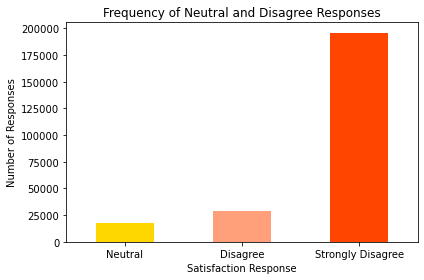

In [6]:


# Filter for neutral and negative responses
focus_responses = ['Neutral', 'Disagree', 'Strongly Disagree']
filtered = df[df['Satisfaction Response'].isin(focus_responses)]

# Count frequencies
focus_counts = filtered['Satisfaction Response'].value_counts().reindex(focus_responses)

# Plot
focus_counts.plot(kind='bar', color=['#FFD700', '#FFA07A', '#FF4500'])
plt.title('Frequency of Neutral and Disagree Responses')
plt.xlabel('Satisfaction Response')
plt.ylabel('Number of Responses')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show(); 

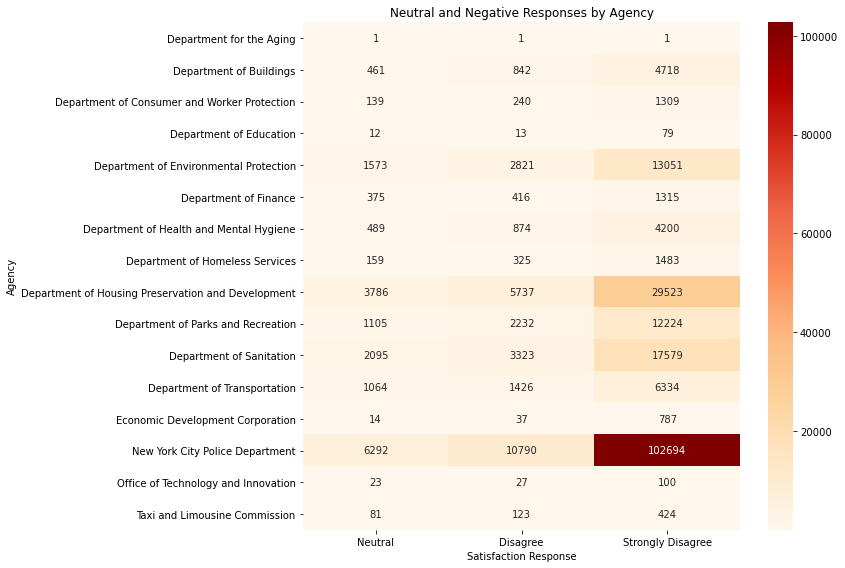

In [7]:


# Filter relevant responses
focus_responses = ['Neutral', 'Disagree', 'Strongly Disagree']
filtered = df[df['Satisfaction Response'].isin(focus_responses)]

# Create a pivot table
agency_pivot = (
    filtered.groupby(['Agency Name', 'Satisfaction Response'])
    .size()
    .unstack(fill_value=0)
    .reindex(columns=focus_responses)
)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(agency_pivot, annot=True, fmt='d', cmap='OrRd')
plt.title('Neutral and Negative Responses by Agency')
plt.xlabel('Satisfaction Response')
plt.ylabel('Agency')
plt.tight_layout()
plt.show(); 

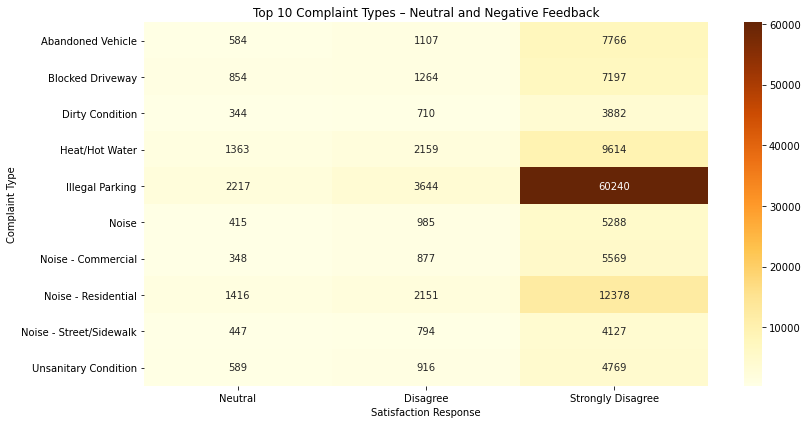

In [8]:
"""
Top 10 compaints types by neutral and negative feedback
"""

# Filter only relevant satisfaction responses
focus_responses = ['Neutral', 'Disagree', 'Strongly Disagree']
filtered = df[df['Satisfaction Response'].isin(focus_responses)]

# Count total focus responses per complaint type
top_complaints = (
    filtered['Complaint Type']
    .value_counts()
    .nlargest(10)
    .index
)

# Filter only those top complaint types
filtered_top = filtered[filtered['Complaint Type'].isin(top_complaints)]

# Create a pivot table for the top complaint types
complaint_pivot = (
    filtered_top.groupby(['Complaint Type', 'Satisfaction Response'])
    .size()
    .unstack(fill_value=0)
    .reindex(columns=focus_responses)
)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(complaint_pivot, annot=True, fmt='d', cmap='YlOrBr')
plt.title('Top 10 Complaint Types – Neutral and Negative Feedback')
plt.xlabel('Satisfaction Response')
plt.ylabel('Complaint Type')
plt.tight_layout()
plt.show(); 

### Objective 3: Determine Sentiment Polarity of Textual Feedback 



In [9]:
# Copying dataframe for NLP 
df_sentiment = df[df["Dissatisfaction Reason"] != "Not Applicable"].copy()

In [11]:
print(df_sentiment.columns)


Index(['Unique Key', 'Agency Acronym', 'Agency Name', 'Complaint Type',
       'Descriptor', 'Borough', 'Resolution Description', 'Survey Year',
       'Survey Month', 'Satisfaction Response', 'Dissatisfaction Reason',
       'Survey Date'],
      dtype='object')


In [ ]:
"""
Preparing text data by removing noise like punctuation, stopwords, and short 
words, and lemmatizing so it’s suitable for downstream tasks like clustering,
sentiment analysis, or topic modeling.
"""

# Importing necessary NLP libraries
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt', download_dir='/tmp/nltk_data')
nltk.data.path.append('/tmp/nltk_data')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Lowercase
    text = text.lower()
    
    # Remove punctuation
    text = re.sub(f"[{re.escape(string.punctuation)}]", " ", text)
    
    # Tokenize using basic split
    tokens = text.split()
    
    # Remove stopwords and short words
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    
    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return " ".join(tokens)

# Apply cleaning to df
df_sentiment['clean_text'] = df_sentiment['Dissatisfaction Reason'].apply(clean_text)

[nltk_data] Downloading package punkt to /tmp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=3000, ngram_range=(1, 2))
X = vectorizer.fit_transform(df_sentiment['clean_text'])

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
df_sentiment['cluster'] = kmeans.fit_predict(X)

c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [15]:
df_sentiment.groupby("cluster")["Agency Name"].value_counts()

cluster  Agency Name                                       
0        New York City Police Department                       50692
         Department of Housing Preservation and Development    19688
         Department of Sanitation                              12160
         Department of Environmental Protection                 8229
         Department of Parks and Recreation                     7335
                                                               ...  
4        Taxi and Limousine Commission                            18
         Department of Consumer and Worker Protection              7
         Department of Education                                   3
         Economic Development Corporation                          3
         Office of Technology and Innovation                       1
Name: count, Length: 76, dtype: int64

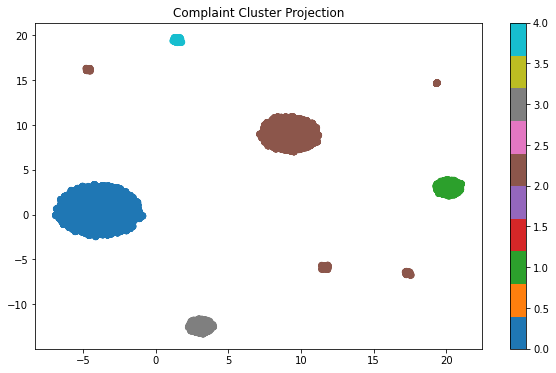

In [16]:
"""
Reducing X into dimensions using UMAP for visualization to create a scatter 
plot with each point representing a complaint.
"""

from umap import UMAP
import matplotlib.pyplot as plt

embedding = UMAP(n_neighbors=15, min_dist=0.1).fit_transform(X)

plt.figure(figsize=(10,6))
plt.scatter(embedding[:, 0], embedding[:, 1], c=df_sentiment["cluster"], cmap="tab10")
plt.title("Complaint Cluster Projection")
plt.colorbar()
plt.show(); 

This UMAP plot visually separates data into distinct clusters, each denoted by a unique color, reflecting underlying similarities in the data. The arrangement in two dimensions suggests how closely related the points are, with tighter groupings indicating stronger similarity. 

In [ ]:
"""
Using the keywords to enrich topics by extracting top keywords per cluster
"""
from sklearn.feature_extraction.text import TfidfVectorizer

# For each cluster
for label in df_sentiment['cluster'].unique():
    text = df_sentiment[df_sentiment['cluster'] == label]['Dissatisfaction Reason'].dropna()
    
    tfidf = TfidfVectorizer(max_features=10, stop_words='english')
    tfidf_matrix = tfidf.fit_transform(text)
    
    top_words = tfidf.get_feature_names_out()
    print(f"Cluster {label} keywords: {top_words}")

Cluster 0 keywords: ['agency' 'correct' 'did' 'issue']
Cluster 1 keywords: ['confusing' 'inaccurate' 'incomplete' 'status' 'unhelpful' 'updates']
Cluster 2 keywords: ['accurate' 'agency' 'complete' 'corrected' 'did' 'information' 'provide'
 'said' 'status' 'updates']
Cluster 3 keywords: ['agency' 'correct' 'did' 'issue' 'reopened' 'request' 'service']
Cluster 4 keywords: ['agency' 'corrected' 'issue' 'long' 'respond' 'took']


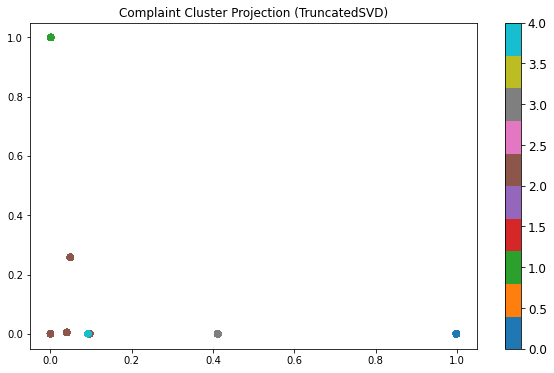

In [19]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

svd = TruncatedSVD(n_components=2, random_state=42)
svd_embeddings = svd.fit_transform(X)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(svd_embeddings[:, 0], svd_embeddings[:, 1], c=df_sentiment["cluster"], cmap="tab10")
plt.title("Complaint Cluster Projection (TruncatedSVD)")

# Add colorbar and set font size
cbar = plt.colorbar(scatter)
cbar.ax.tick_params(labelsize=12)  # Increase the label size (e.g., 12 or higher)

plt.show(); 

The visualization displays clusters of citizen complaints projected into two dimensions using TruncatedSVD. Each color represents a distinct cluster, grouping complaints with similar textual content. The layout suggests two dominant clusters (green and blue), with others overlapping, indicating shared themes or closely related issues.

In [20]:
df_sentiment.head()

,Unique Key,Agency Acronym,Agency Name,Complaint Type,Descriptor,Borough,Resolution Description,Survey Year,Survey Month,Satisfaction Response,Dissatisfaction Reason,Survey Date,clean_text,cluster
1,58524985-00281320,DOB,Department of Buildings,Adult Establishment,Zoning Violation,BROOKLYN,The Department of Buildings investigated this ...,2024,11,Strongly Disagree,The Agency did not correct the issue.,2024-11-01,agency correct issue,0
4,40782130-00128055,DOB,Department of Buildings,Advertising Sign,Billboard,MANHATTAN,The Department of Buildings investigated this ...,2023,10,Strongly Disagree,"Status updates were unhelpful, inaccurate, inc...",2023-10-01,status update unhelpful inaccurate incomplete ...,1
5,21938850-00059571,DOB,Department of Buildings,Advertising Sign,Poster,MANHATTAN,The Department of Buildings reviewed this comp...,2023,2,Disagree,"Status updates were unhelpful, inaccurate, inc...",2023-02-01,status update unhelpful inaccurate incomplete ...,1
8,59047293-00260068,DOB,Department of Buildings,Advertising Sign,Billboard,MANHATTAN,The Department of Buildings reviewed this comp...,2024,10,Strongly Disagree,Other,2024-10-01,,2
9,72293110-00189894,DOB,Department of Buildings,Adult Establishment,Zoning Violation,MANHATTAN,The Department of Buildings reviewed this comp...,2024,4,Strongly Disagree,The Agency did not provide enough status updates.,2024-04-01,agency provide enough status update,2


In [23]:
"""
Clustering dissatisfaction reasons to provide more justified, keyword-based 
summaries of citizens complaints per agency
"""

agencies = df_sentiment['Agency Name'].unique()
cluster_labels = df_sentiment['cluster'].unique()

for agency in agencies:
    print(f"\n=== {agency} ===")
    agency_data = df_sentiment[df_sentiment['Agency Name'] == agency]
    
    for label in cluster_labels:
        cluster_data = agency_data[agency_data['cluster'] == label]['Dissatisfaction Reason'].dropna()
        
        if not cluster_data.empty:
            tfidf = TfidfVectorizer(max_features=10, stop_words='english')
            tfidf_matrix = tfidf.fit_transform(cluster_data)
            top_words = tfidf.get_feature_names_out()
            print(f"  Cluster {label} keywords: {', '.join(top_words)}")



=== Department of Buildings ===
  Cluster 0 keywords: agency, correct, did, issue
  Cluster 1 keywords: confusing, inaccurate, incomplete, status, unhelpful, updates
  Cluster 2 keywords: accurate, agency, complete, corrected, did, information, provide, said, status, updates
  Cluster 3 keywords: agency, correct, did, issue, reopened, request, service
  Cluster 4 keywords: agency, corrected, issue, long, respond, took

=== Department for the Aging ===
  Cluster 0 keywords: agency, correct, did, issue

=== Department of Parks and Recreation ===
  Cluster 0 keywords: agency, correct, did, issue
  Cluster 1 keywords: confusing, inaccurate, incomplete, status, unhelpful, updates
  Cluster 2 keywords: accurate, agency, complete, corrected, did, information, provide, said, status, updates
  Cluster 3 keywords: agency, correct, did, issue, reopened, request, service
  Cluster 4 keywords: agency, corrected, issue, long, respond, took

=== Department of Environmental Protection ===
  Cluster 0

In [ ]:
"""
Since "Dissatisfaction Reason" is too sparse and repetitve, using unsupervised
learning (topic modelling) to be able to generalize and expand the current 
reasons. 
"""

from bertopic import BERTopic

# Drop NaNs and convert to list
texts = df_sentiment['clean_text'].dropna().astype(str).tolist()

# Fit BERTopic
topic_model = BERTopic(language="english", verbose=True)
topics, _ = topic_model.fit_transform(texts)

# Add topics back to DataFrame
df_sentiment.loc[df_sentiment['clean_text'].notna(), 'justified_dissatisfaction'] = topics

In [ ]:
"""
Mapping the topic representations by joining the list into readable strings
"""

# Join the list of words into a string
topic_info = topic_model.get_topic_info()
topic_labels = topic_info.set_index("Topic")["Representation"].apply(lambda words: ", ".join(words)).to_dict()

# Map topic labels to dataframe
df_sentiment["justified_dissatisfaction_label"] = df_sentiment["cluster"].map(topic_labels)


In [40]:
df_sentiment.head()


,Unique Key,Agency Acronym,Agency Name,Complaint Type,Descriptor,Borough,Resolution Description,Survey Year,Survey Month,Satisfaction Response,Dissatisfaction Reason,Survey Date,clean_text,cluster,justified_dissatisfaction,justified_dissatisfaction_label
1,58524985-00281320,DOB,Department of Buildings,Adult Establishment,Zoning Violation,BROOKLYN,The Department of Buildings investigated this ...,2024,11,Strongly Disagree,The Agency did not correct the issue.,2024-11-01,agency correct issue,0,"[correct, issue, agency, , , , , , , ]","unhelpful, incomplete, inaccurate, confusing, ..."
4,40782130-00128055,DOB,Department of Buildings,Advertising Sign,Billboard,MANHATTAN,The Department of Buildings investigated this ...,2023,10,Strongly Disagree,"Status updates were unhelpful, inaccurate, inc...",2023-10-01,status update unhelpful inaccurate incomplete ...,1,"[unhelpful, incomplete, inaccurate, confusing,...","request, reopened, service, correct, issue, ag..."
5,21938850-00059571,DOB,Department of Buildings,Advertising Sign,Poster,MANHATTAN,The Department of Buildings reviewed this comp...,2023,2,Disagree,"Status updates were unhelpful, inaccurate, inc...",2023-02-01,status update unhelpful inaccurate incomplete ...,1,"[unhelpful, incomplete, inaccurate, confusing,...","request, reopened, service, correct, issue, ag..."
8,59047293-00260068,DOB,Department of Buildings,Advertising Sign,Billboard,MANHATTAN,The Department of Buildings reviewed this comp...,2024,10,Strongly Disagree,Other,2024-10-01,,2,"[correct, issue, agency, reason, provided, , ,...","respond, long, took, corrected, issue, agency,..."
9,72293110-00189894,DOB,Department of Buildings,Adult Establishment,Zoning Violation,MANHATTAN,The Department of Buildings reviewed this comp...,2024,4,Strongly Disagree,The Agency did not provide enough status updates.,2024-04-01,agency provide enough status update,2,"[enough, provide, status, update, agency, , , ...","respond, long, took, corrected, issue, agency,..."


In [41]:
"""
Aggregating top reasons per agency
"""

agency_topics = (
    df_sentiment.groupby(["Agency Acronym", "justified_dissatisfaction_label"])
    .size()
    .reset_index(name="count")
    .sort_values(["Agency Acronym", "count"], ascending=[True, False])
)

# Previewing them
agency_topics.head(10)


,Agency Acronym,justified_dissatisfaction_label,count
4,DCWP,"unhelpful, incomplete, inaccurate, confusing, ...",620
3,DCWP,"respond, long, took, corrected, issue, agency,...",558
2,DCWP,"request, reopened, service, correct, issue, ag...",285
1,DCWP,"information, complete, said, accurate, provide...",78
0,DCWP,"enough, provide, status, update, agency, , , , ,",7
9,DEP,"unhelpful, incomplete, inaccurate, confusing, ...",8229
8,DEP,"respond, long, took, corrected, issue, agency,...",4199
7,DEP,"request, reopened, service, correct, issue, ag...",2036
6,DEP,"information, complete, said, accurate, provide...",1099
5,DEP,"enough, provide, status, update, agency, , , , ,",302


In [44]:
df.head()

,Unique Key,Agency Acronym,Agency Name,Complaint Type,Descriptor,Borough,Resolution Description,Survey Year,Survey Month,Satisfaction Response,Dissatisfaction Reason,Survey Date
0,16657800-00015172,DOB,Department of Buildings,Adult Establishment,Zoning Violation,MANHATTAN,The Department of Buildings investigated this ...,2022,10,Strongly Agree,Not Applicable,2022-10-01
1,58524985-00281320,DOB,Department of Buildings,Adult Establishment,Zoning Violation,BROOKLYN,The Department of Buildings investigated this ...,2024,11,Strongly Disagree,The Agency did not correct the issue.,2024-11-01
2,75073480-00178242,DFTA,Department for the Aging,Legal Services Provider Complaint,Not Provided,MANHATTAN,The Department for the Aging contacted you and...,2024,3,Strongly Agree,Not Applicable,2024-03-01
3,46435198-00170848,DOB,Department of Buildings,Advertising Sign,Poster,MANHATTAN,The Department of Buildings reviewed this comp...,2024,2,Neutral,Not Applicable,2024-02-01
4,40782130-00128055,DOB,Department of Buildings,Advertising Sign,Billboard,MANHATTAN,The Department of Buildings investigated this ...,2023,10,Strongly Disagree,"Status updates were unhelpful, inaccurate, inc...",2023-10-01


### Sentiment Analysis

VADER(Valence Aware Dictionary and sEntiment Reasoner) is a rule-based sentiment analysis tool ideal for short, opinion-based text like the “Dissatisfaction Reason” responses. It assigns sentiment scores—positive, negative, neutral, and a compound score—using a built-in dictionary and grammar rules. In this case, it can be applied to the cleaned text to compute a compound score and classify feedback as Positive, Neutral, or Negative using simple thresholds. This supports the goal of identifying emotional tone without needing to train a custom model.

In [42]:
"""
Applying VADER to the justified dissatisfaction label
"""

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initializing
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_scores(text):
    return analyzer.polarity_scores(text)

# Applying to the DataFrame
sentiment_scores = df_sentiment["justified_dissatisfaction_label"].apply(get_sentiment_scores)

# Converting to dataframe
sentiment_df = pd.DataFrame(sentiment_scores.tolist())

# Merge scores into the original dataframe
df_sentiment = pd.concat([df_sentiment, sentiment_df], axis=1)

In [43]:
df_sentiment.head()

,Unique Key,Agency Acronym,Agency Name,Complaint Type,Descriptor,Borough,Resolution Description,Survey Year,Survey Month,Satisfaction Response,Dissatisfaction Reason,Survey Date,clean_text,cluster,justified_dissatisfaction,justified_dissatisfaction_label,neg,neu,pos,compound
1,58524985-00281320,DOB,Department of Buildings,Adult Establishment,Zoning Violation,BROOKLYN,The Department of Buildings investigated this ...,2024.0,11.0,Strongly Disagree,The Agency did not correct the issue.,2024-11-01,agency correct issue,0.0,"[correct, issue, agency, , , , , , , ]","unhelpful, incomplete, inaccurate, confusing, ...",0.000,1.000,0.0,0.0000
4,40782130-00128055,DOB,Department of Buildings,Advertising Sign,Billboard,MANHATTAN,The Department of Buildings investigated this ...,2023.0,10.0,Strongly Disagree,"Status updates were unhelpful, inaccurate, inc...",2023-10-01,status update unhelpful inaccurate incomplete ...,1.0,"[unhelpful, incomplete, inaccurate, confusing,...","request, reopened, service, correct, issue, ag...",0.000,1.000,0.0,0.0000
5,21938850-00059571,DOB,Department of Buildings,Advertising Sign,Poster,MANHATTAN,The Department of Buildings reviewed this comp...,2023.0,2.0,Disagree,"Status updates were unhelpful, inaccurate, inc...",2023-02-01,status update unhelpful inaccurate incomplete ...,1.0,"[unhelpful, incomplete, inaccurate, confusing,...","request, reopened, service, correct, issue, ag...",0.000,1.000,0.0,0.0000
8,59047293-00260068,DOB,Department of Buildings,Advertising Sign,Billboard,MANHATTAN,The Department of Buildings reviewed this comp...,2024.0,10.0,Strongly Disagree,Other,2024-10-01,,2.0,"[correct, issue, agency, reason, provided, , ,...","respond, long, took, corrected, issue, agency,...",0.000,1.000,0.0,0.0000
9,72293110-00189894,DOB,Department of Buildings,Adult Establishment,Zoning Violation,MANHATTAN,The Department of Buildings reviewed this comp...,2024.0,4.0,Strongly Disagree,The Agency did not provide enough status updates.,2024-04-01,agency provide enough status update,2.0,"[enough, provide, status, update, agency, , , ...","respond, long, took, corrected, issue, agency,...",0.192,0.808,0.0,-0.2263


In [45]:
"""
Creating sentiment labels 
"""

def label_sentiment(compound):
    if compound >= 0.05:
        return "positive"
    elif compound <= -0.05:
        return "negative"
    else:
        return "neutral"

df_sentiment["sentiment_label"] = df_sentiment["compound"].apply(label_sentiment)

In [50]:
"""
Simple supervised learning with Logistic Regression (Binary sentiment 
classification) to flag dissatisfaction cases
"""

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

df_sentiment_clean = df_sentiment.dropna(subset=["clean_text", "sentiment_label"])
X = df_sentiment_clean["clean_text"]
y = df_sentiment_clean["sentiment_label"]

# Vectorizing
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, stratify=y, random_state=42)

# Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluating the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00     17071
     neutral       0.70      1.00      0.82     39168

    accuracy                           0.70     56239
   macro avg       0.35      0.50      0.41     56239
weighted avg       0.49      0.70      0.57     56239



The model achieved 70% overall accuracy but failed completely to identify the negative class, with a precision, recall, and F1-score of 0.00—suggesting it predicted nearly all samples as *neutral*. This severe imbalance in performance implies that the model is biased due to class imbalance in the training data. The macro average metrics are poor, showing the model’s inability to generalize across classes. To improve, apply techniques like class weighting, oversampling (e.g., SMOTE), or use a model that handles imbalance better and ensuring the train set has representative examples of both classes.

In [53]:
df_sentiment.to_csv("eda_incl.csv", index=False)